# OpenQDC Hands-on Tutorial

## Instantiate and GO!

If you don't have the dataset downloaded, it will be downloaded automatically and cached. You just instantiate the class and you are ready to go.
Change of units is done automatically upon loading based on the units of the dataset.

Supported energy units: ["kcal/mol", "kj/mol", "hartree", "ev"]

Supported distance units: ["ang", "nm", "bohr"]

In [31]:
from openqdc.datasets import Spice
ds = Spice(
    energy_unit="kcal/mol",
    distance_unit="ang",
)


2024-02-29 12:17:13.349 | INFO     | openqdc.datasets.base:read_preprocess:381 - Reading preprocessed data.
2024-02-29 12:17:13.349 | INFO     | openqdc.datasets.base:read_preprocess:382 - Dataset spice with the following units:
                     Energy: hartree,
                     Distance: bohr,
                     Forces: hartree/bohr
2024-02-29 12:17:13.978 | INFO     | openqdc.datasets.base:read_preprocess:406 - Loaded atomic_inputs with shape (33175288, 5), dtype float32
2024-02-29 12:17:13.979 | INFO     | openqdc.datasets.base:read_preprocess:406 - Loaded position_idx_range with shape (1110165, 2), dtype int32
2024-02-29 12:17:13.979 | INFO     | openqdc.datasets.base:read_preprocess:406 - Loaded energies with shape (1110165, 1), dtype float32
2024-02-29 12:17:13.980 | INFO     | openqdc.datasets.base:read_preprocess:406 - Loaded forces with shape (33175288, 3, 1), dtype float32
2024-02-29 12:17:13.980 | INFO     | openqdc.datasets.base:read_preprocess:406 - Loaded name w

### Items from the dataset object class are obtained through the "get" method.

The dictionary of the item contains different important keys:
- 'positions' : numpy array of the 3d atomic positions (n x 3)
- 'atomic_numbers': numpy array of the atomic numbers (n)
- 'charges': numpy array of the formal charges for the molecule (n)
- 'e0': isolated atom energy of the atoms in the molecule (n x n_level_of_theories)
- 'energies': potential energy of the molecule (n_level_of_theries)
- 'name': name or smiles (is present) of the molecule
- 'subset': subset of the dataset the molecule belongs to
- 'forces': if present, the forces on the atoms (n x 3 x n_level_of_theories_forces)

In [39]:
ds[0]

{'positions': array([[ 0.71034044,  2.1993854 , -1.7317094 ],
        [ 0.06135919,  2.6528177 , -0.4163168 ],
        [ 1.762424  ,  1.0939031 , -1.4321265 ],
        [-0.22598556,  1.6802124 ,  0.5978407 ],
        [ 1.1740401 , -0.04154727, -0.512898  ],
        [-0.41957757, -0.24454471,  3.0900123 ],
        [ 0.7238282 ,  0.52511275,  0.8248042 ],
        [ 0.05533566, -0.6713925 ,  1.6488242 ],
        [ 0.9663853 , -1.8097109 ,  1.8863406 ],
        [-0.0657557 ,  1.8550861 , -2.3939755 ],
        [ 1.2260683 ,  3.0082219 , -2.2036319 ],
        [-0.8098082 ,  3.201651  , -0.6507186 ],
        [ 0.792407  ,  3.368585  ,  0.01799216],
        [ 2.558414  ,  1.5826052 , -0.9704587 ],
        [ 2.166226  ,  0.64460325, -2.384977  ],
        [-0.4735094 ,  2.0926695 ,  1.5486747 ],
        [-1.1792994 ,  1.1978384 ,  0.34465855],
        [ 1.8563557 , -0.90775317, -0.5115611 ],
        [ 0.31435642, -0.42179283, -1.0628686 ],
        [ 0.42152542,  0.25200853,  3.627957  ],
       

### Alternatively, we can also retrieve the data from the dataset object class as ase.Atoms using the get_ase_atoms!

In [40]:
ds.get_ase_atoms(0)

Atoms(symbols='C8NH18', pbc=False, initial_charges=...)

In [53]:
ds.get_ase_atoms(0).info

{'e0': array([[-23765.42563669],
        [-23765.42563669],
        [-23765.42563669],
        [-23765.42563669],
        [-23765.42563669],
        [-23765.42563669],
        [-23765.42563669],
        [-23765.42563669],
        [-33939.41501837],
        [  -312.9767089 ],
        [  -312.9767089 ],
        [  -312.9767089 ],
        [  -312.9767089 ],
        [  -312.9767089 ],
        [  -312.9767089 ],
        [  -312.9767089 ],
        [  -312.9767089 ],
        [  -312.9767089 ],
        [  -312.9767089 ],
        [  -312.9767089 ],
        [  -312.9767089 ],
        [  -312.9767089 ],
        [  -312.9767089 ],
        [  -312.9767089 ],
        [  -312.9767089 ],
        [  -312.9767089 ],
        [  -312.9767089 ]]),
 'energies': array([-232450.64], dtype=float32),
 'name': '[H:10][C:1]1([C:2]([C:4]([C:7]([C:5]([C:3]1([H:14])[H:15])([H:18])[H:19])([H:23])[C@:8]([H:24])([C:6]([H:20])([H:21])[H:22])[N+:9]([H:25])([H:26])[H:27])([H:16])[H:17])([H:12])[H:13])[H:11]',
 'subset': '

### Iterators 

The method as_iter(atoms=False) returns an iterator over the dataset. If atoms is True, the iterator returns the data as an ase.Atoms objects. Otherwise, it returns the dictionary of the item.

In [41]:
for i in ds.as_iter():
    print(i)
    break

{'positions': array([[ 0.71034044,  2.1993854 , -1.7317094 ],
       [ 0.06135919,  2.6528177 , -0.4163168 ],
       [ 1.762424  ,  1.0939031 , -1.4321265 ],
       [-0.22598556,  1.6802124 ,  0.5978407 ],
       [ 1.1740401 , -0.04154727, -0.512898  ],
       [-0.41957757, -0.24454471,  3.0900123 ],
       [ 0.7238282 ,  0.52511275,  0.8248042 ],
       [ 0.05533566, -0.6713925 ,  1.6488242 ],
       [ 0.9663853 , -1.8097109 ,  1.8863406 ],
       [-0.0657557 ,  1.8550861 , -2.3939755 ],
       [ 1.2260683 ,  3.0082219 , -2.2036319 ],
       [-0.8098082 ,  3.201651  , -0.6507186 ],
       [ 0.792407  ,  3.368585  ,  0.01799216],
       [ 2.558414  ,  1.5826052 , -0.9704587 ],
       [ 2.166226  ,  0.64460325, -2.384977  ],
       [-0.4735094 ,  2.0926695 ,  1.5486747 ],
       [-1.1792994 ,  1.1978384 ,  0.34465855],
       [ 1.8563557 , -0.90775317, -0.5115611 ],
       [ 0.31435642, -0.42179283, -1.0628686 ],
       [ 0.42152542,  0.25200853,  3.627957  ],
       [-0.5416419 , -1.11

In [42]:
for i in ds.as_iter(atoms=True):
    print(i)
    break

Atoms(symbols='C8NH18', pbc=False, initial_charges=...)


### Isolated atoms energies [e0s]

The potential energy of the system can be decomposed into the sum of isolated atom energies and the formation energy.

$U(A_1, A_2, ...) = \sum_{i_1}^N e_0(A_i) + e(A_1, A_2, ...)$

The isolated atoms energies are automatically associated with the correct level of theory, and you can get access as follow

In [43]:
from openqdc.methods import QmMethod

# Get the b3lyp/6-31g* method
method = QmMethod.B3LYP_6_31G_D
method.atom_energies_dict

{('H', -1): -0.4618190740256503,
 ('H', 0): -0.5002733301377901,
 ('H', 1): 0.0,
 ('Li', 1): -7.284546111273075,
 ('B', -3): -23.577268753399462,
 ('B', -1): -24.614577395156598,
 ('B', 0): -24.65435524492553,
 ('B', 3): -22.018169862974275,
 ('C', -1): -37.844269871879376,
 ('C', 0): -37.84628033285479,
 ('C', 1): -37.42731164237431,
 ('N', -1): -54.52864356359092,
 ('N', 0): -54.584488815424095,
 ('N', 1): -54.0458621835885,
 ('O', -1): -75.05272792994404,
 ('O', 0): -75.06062109946738,
 ('O', 1): -74.54659271939704,
 ('F', -1): -99.75408410035712,
 ('F', 0): -99.71553471526475,
 ('Na', 1): -162.081235395777,
 ('Mg', 2): -199.22734695613283,
 ('Si', 4): -285.5564410277949,
 ('Si', 0): -289.3717359984153,
 ('Si', -4): -288.02795351148654,
 ('P', 0): -341.2580911838578,
 ('P', 1): -340.8765976669208,
 ('S', -1): -398.16568433994024,
 ('S', 0): -398.1049932797066,
 ('S', 1): -397.7199808615457,
 ('Cl', -2): -459.5066184980746,
 ('Cl', -1): -460.25223446009306,
 ('Cl', 0): -460.136243469

In [44]:
# Get the matrix of atomization energies for the b3lyp/6-31g* method
method.atom_energies_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Chemical space from SOAP descriptors

openQDC offer a simple way to calculate the Smooth Overlaps of Atomic Positions (SOAP) descriptors for the molecules in the dataset.
The method get_soap_descriptors returns the SOAP descriptors for the molecules in the dataset.

In [45]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
datum = ds.soap_descriptors(n_samples=500, progress=True)
reducer = PCA()
embedding = reducer.fit_transform(datum["soap"])



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 459.21it/s]


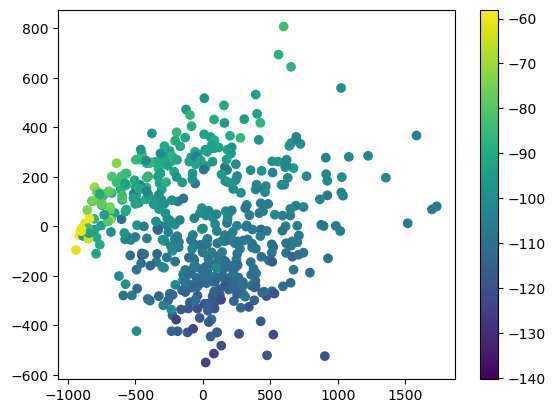

In [46]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[(ds[i].energies - ds[i]["e0"].sum() )/ ds.data["n_atoms"][i] for i in datum["idxs"]])
plt.colorbar()
